In [2]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from datetime import datetime, timedelta

Populating the interactive namespace from numpy and matplotlib


In [3]:
trans = pd.read_csv('~/Documents/data/transactions.csv')

In [6]:
trans['timestamp'] = pd.to_datetime(trans['timestamp'], format='%Y-%m-%d %H:%M:%S')
date_data = pd.DataFrame({
        'day': pd.to_datetime(trans.timestamp).apply(lambda x: x.day), 
        'month': pd.to_datetime(trans.timestamp).apply(lambda x: x.month)})
# merge date data w/ the rest of the data
df = pd.concat([trans, date_data], axis=1)

In [7]:
df.columns

Index([u'state', u'zip', u'timestamp', u'id', u'org', u'form', u'recurring',
       u'recurring_creatingTransaction', u'creatingTransactionFor', u'amount',
       u'donations_count', u'donations_amt', u'events_count',
       u'events_tickets', u'events_amt', u'registrations_count',
       u'purchases_count', u'purchases_quantity', u'purchases_amt', u'day',
       u'month'],
      dtype='object')

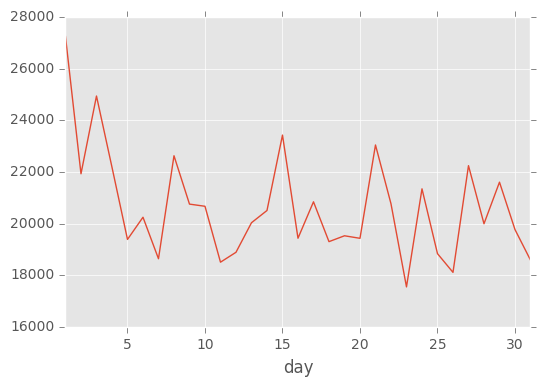

In [10]:
df[df.recurring==0].groupby('day').id.count().plot()